In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os, pickle
from create_datasets import create_nx_datasets

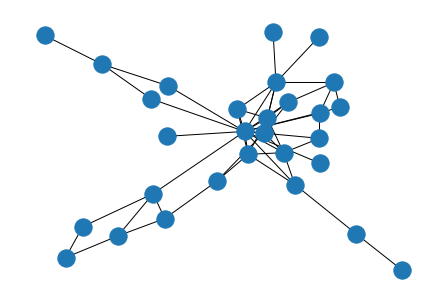

In [39]:
G = nx.read_edgelist('data/bio_networks/AD_SNAP_PPI_brain.edgelist')
nx.draw(G)
plt.show()

nodes = list(G.nodes())
nodes.remove('APOE')

edges = list(G.edges())

In [40]:
nodes

['A2M',
 'NOS3',
 'APP',
 'ADAMTS1',
 'IGF1',
 'IGF1R',
 'TF',
 'INSR',
 'IGF2',
 'WWOX',
 'ENO1',
 'PSEN1',
 'MAPT',
 'PSEN2',
 'CASP3',
 'GSK3B',
 'CALM1',
 'VEGFA',
 'CLU',
 'BAX',
 'PRNP',
 'ACHE',
 'EIF2S1',
 'PICALM',
 'TOMM40',
 'CHRNA7',
 'ATP5F1A',
 'SOD2']

1 A2M removed Graph with 26 nodes and 47 edges


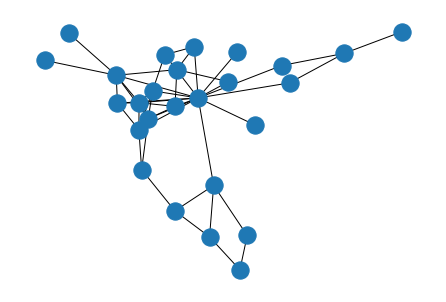

2 NOS3 removed Graph with 28 nodes and 46 edges


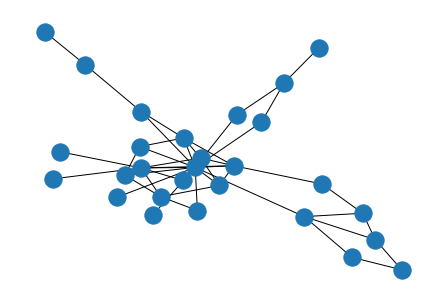

3 APP removed Graph with 22 nodes and 33 edges


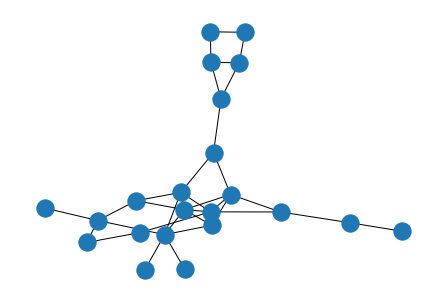

4 ADAMTS1 removed Graph with 27 nodes and 50 edges


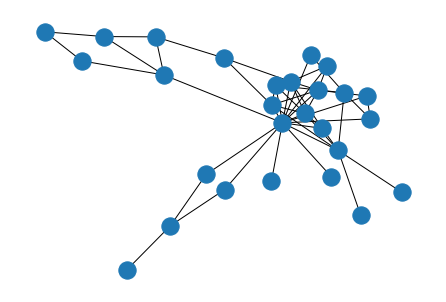

5 IGF1 removed Graph with 28 nodes and 50 edges


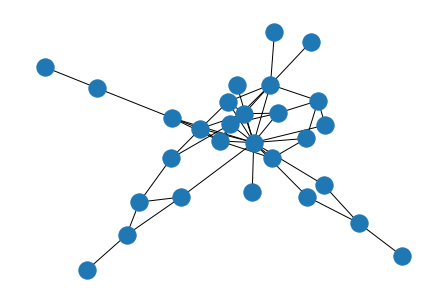

6 IGF1R removed Graph with 28 nodes and 48 edges


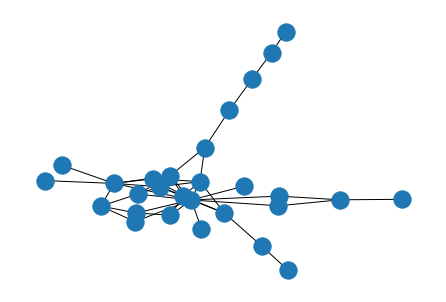

7 TF removed Graph with 28 nodes and 50 edges


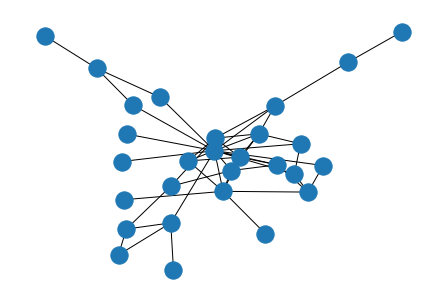

8 INSR removed Graph with 28 nodes and 49 edges


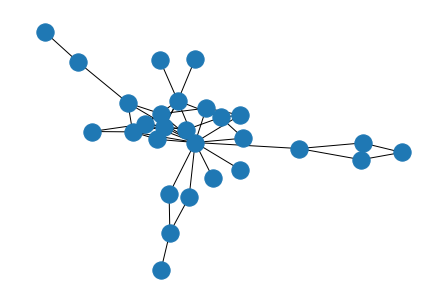

9 IGF2 removed Graph with 28 nodes and 49 edges


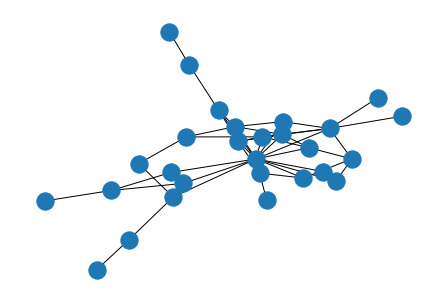

10 WWOX removed Graph with 28 nodes and 51 edges


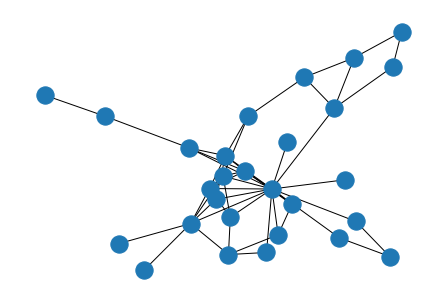

11 ENO1 removed Graph with 27 nodes and 49 edges


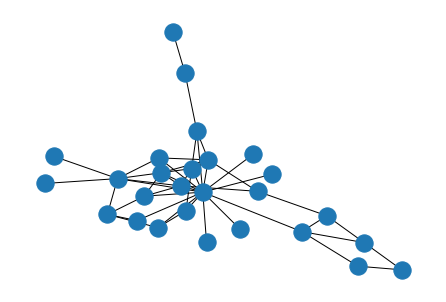

12 PSEN1 removed Graph with 28 nodes and 45 edges


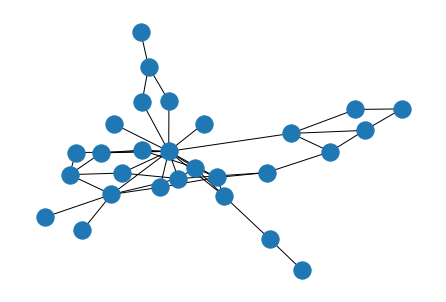

13 MAPT removed Graph with 28 nodes and 46 edges


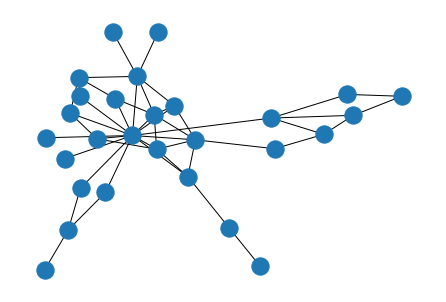

14 PSEN2 removed Graph with 28 nodes and 48 edges


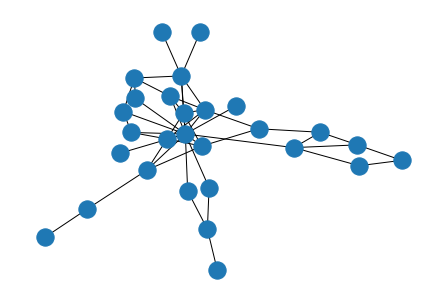

15 CASP3 removed Graph with 26 nodes and 45 edges


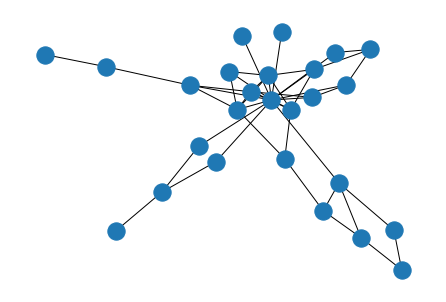

16 GSK3B removed Graph with 28 nodes and 48 edges


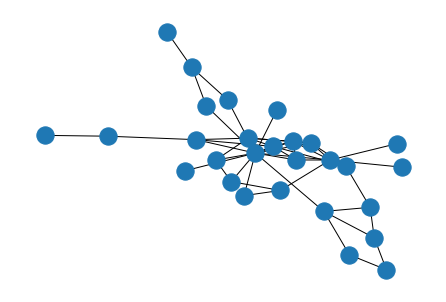

17 CALM1 removed Graph with 28 nodes and 49 edges


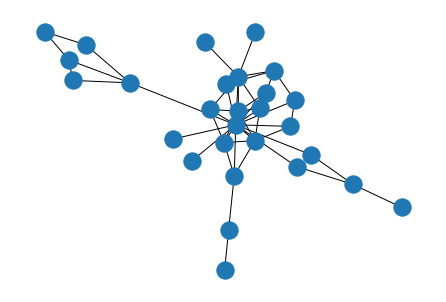

18 VEGFA removed Graph with 28 nodes and 51 edges


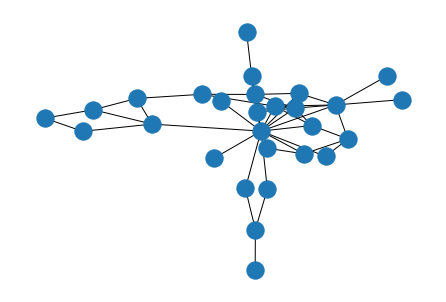

19 CLU removed Graph with 28 nodes and 49 edges


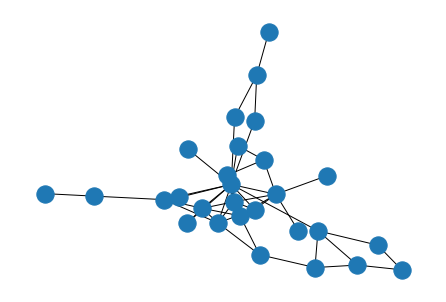

20 BAX removed Graph with 28 nodes and 48 edges


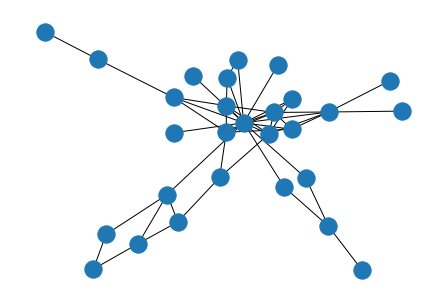

21 PRNP removed Graph with 28 nodes and 49 edges


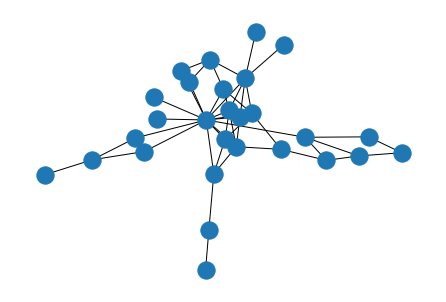

22 ACHE removed Graph with 28 nodes and 50 edges


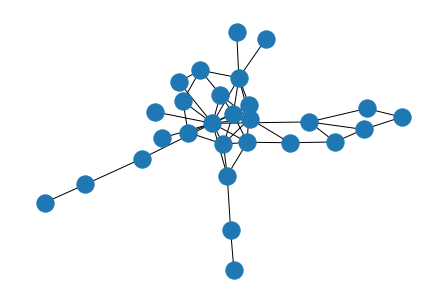

23 EIF2S1 removed Graph with 28 nodes and 51 edges


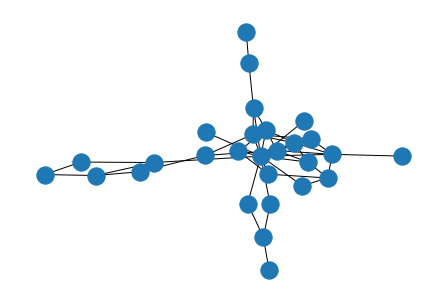

24 PICALM removed Graph with 28 nodes and 51 edges


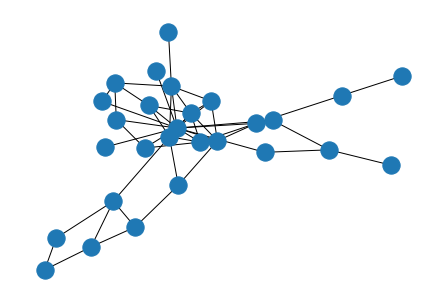

25 TOMM40 removed Graph with 28 nodes and 50 edges


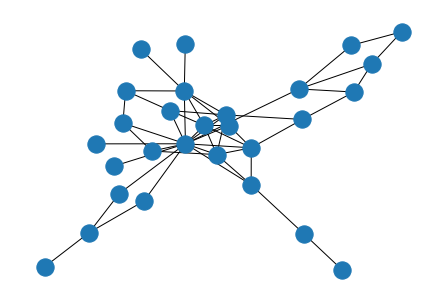

26 CHRNA7 removed Graph with 28 nodes and 51 edges


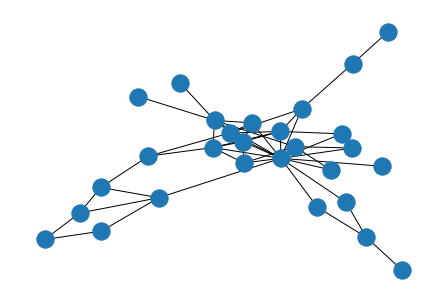

27 ATP5F1A removed Graph with 28 nodes and 50 edges


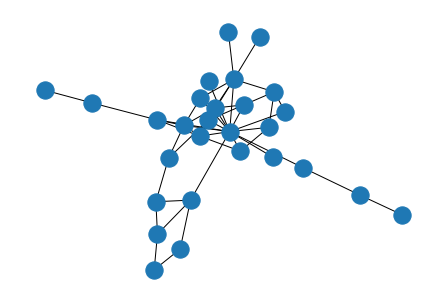

28 SOD2 removed Graph with 28 nodes and 51 edges


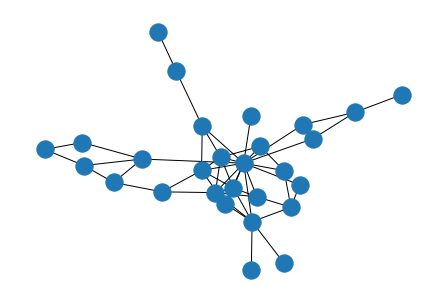

In [5]:
# Delete nodes (one each loop) (APOE is not removed bc we already did it)
count = 1
for node in nodes:
    G = nx.read_edgelist('data/bio_networks/AD_SNAP_PPI_brain.edgelist')
    G.remove_node(node)
    
    for component in list(nx.connected_components(G)):
        if len(component)<5:
            for node_c in component:
                G.remove_node(node_c)
    
    print(count, node, 'removed', G)
    nx.draw(G)
    plt.show()
    
    nx.write_edgelist(G, f'data/sensitivity_analysis/AD_SNAP_PPI_brain_no{node}.edgelist')
    
    count +=1

1 ('A2M', 'NOS3') removed Graph with 29 nodes and 51 edges


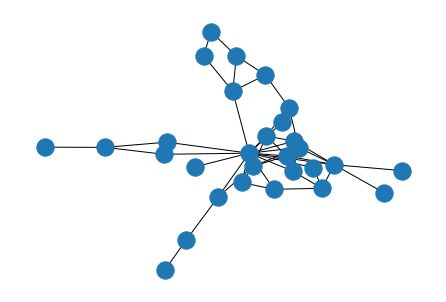

2 ('A2M', 'APP') removed Graph with 29 nodes and 51 edges


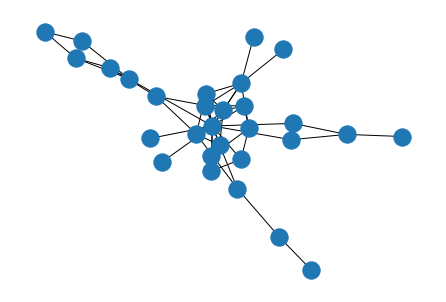

3 ('A2M', 'ADAMTS1') removed Graph with 27 nodes and 50 edges


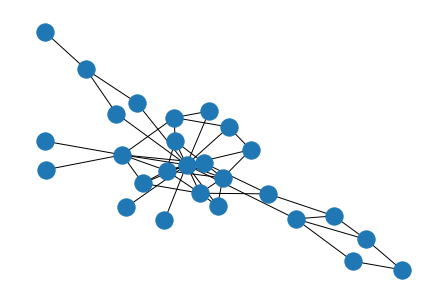

4 ('A2M', 'APOE') removed Graph with 29 nodes and 51 edges


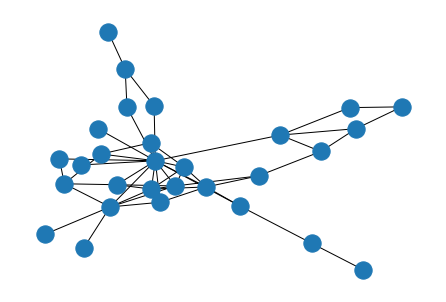

5 ('NOS3', 'PSEN1') removed Graph with 29 nodes and 51 edges


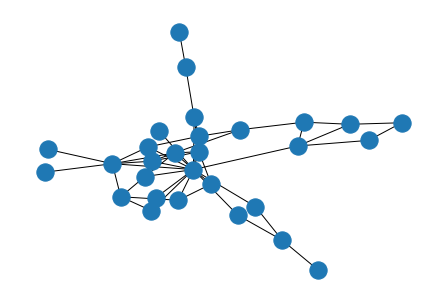

6 ('NOS3', 'PSEN2') removed Graph with 29 nodes and 51 edges


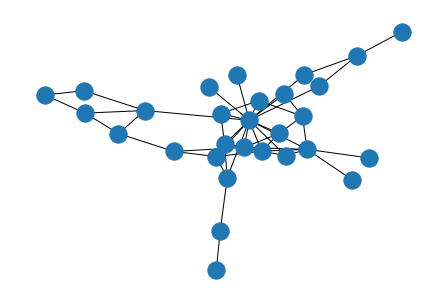

7 ('NOS3', 'CALM1') removed Graph with 29 nodes and 51 edges


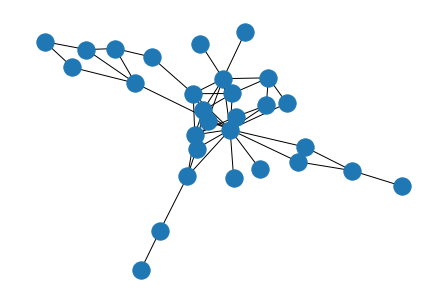

8 ('NOS3', 'APOE') removed Graph with 29 nodes and 51 edges


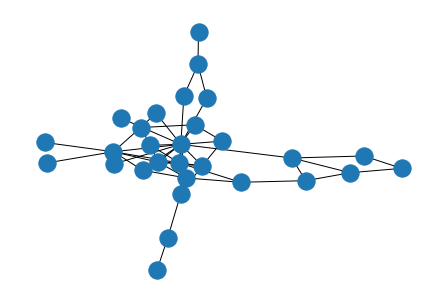

9 ('NOS3', 'APP') removed Graph with 29 nodes and 51 edges


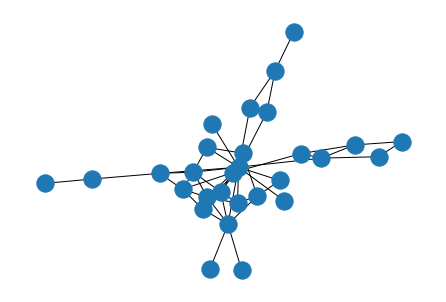

10 ('APP', 'IGF1R') removed Graph with 29 nodes and 51 edges


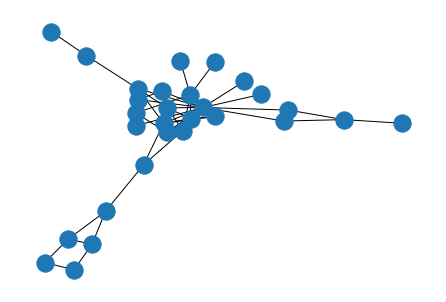

11 ('APP', 'PSEN1') removed Graph with 29 nodes and 51 edges


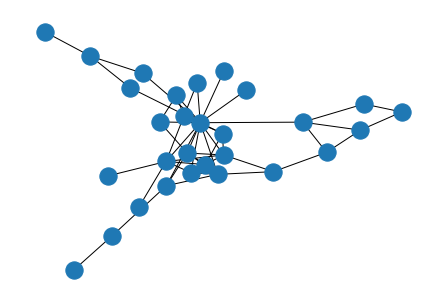

12 ('APP', 'PSEN2') removed Graph with 29 nodes and 51 edges


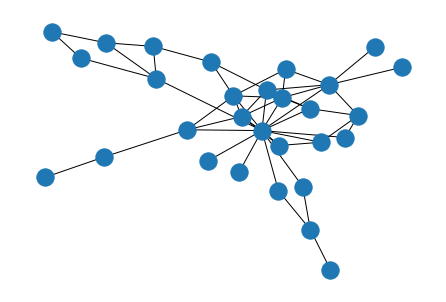

13 ('APP', 'CLU') removed Graph with 29 nodes and 51 edges


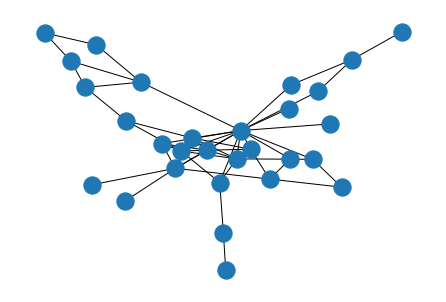

14 ('APP', 'MAPT') removed Graph with 29 nodes and 51 edges


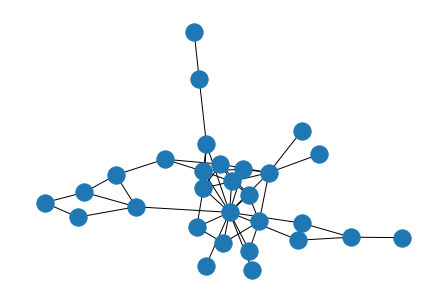

15 ('APP', 'ACHE') removed Graph with 29 nodes and 51 edges


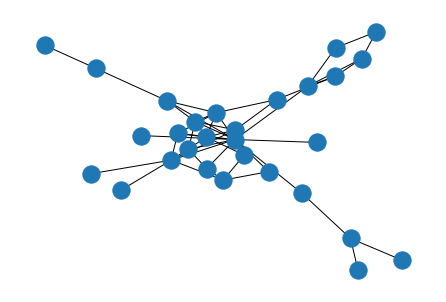

16 ('APP', 'CASP3') removed Graph with 29 nodes and 51 edges


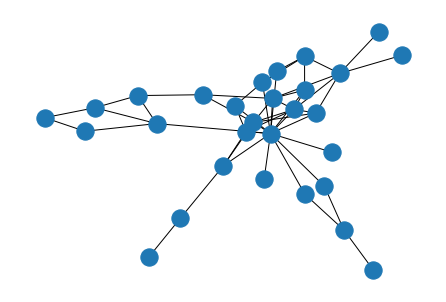

17 ('APP', 'TOMM40') removed Graph with 29 nodes and 51 edges


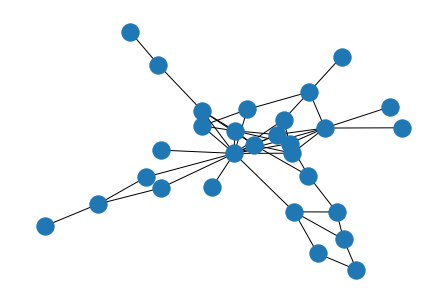

18 ('APP', 'APOE') removed Graph with 29 nodes and 51 edges


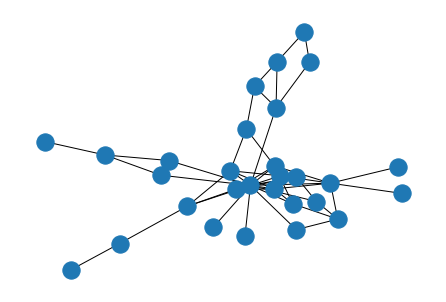

19 ('APP', 'CHRNA7') removed Graph with 28 nodes and 51 edges


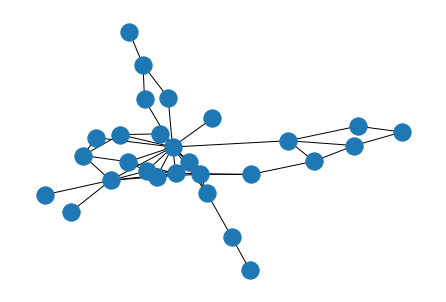

20 ('APP', 'ATP5F1A') removed Graph with 29 nodes and 51 edges


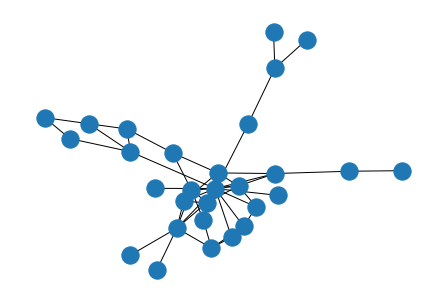

21 ('APP', 'PRNP') removed Graph with 29 nodes and 51 edges


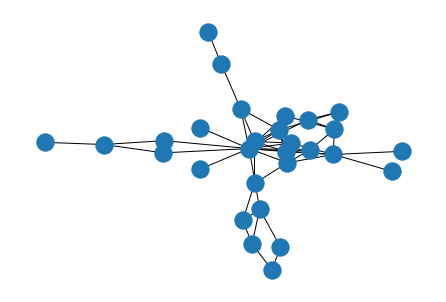

22 ('APP', 'SOD2') removed Graph with 28 nodes and 51 edges


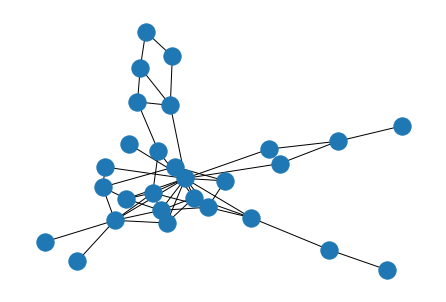

23 ('APP', 'GSK3B') removed Graph with 29 nodes and 51 edges


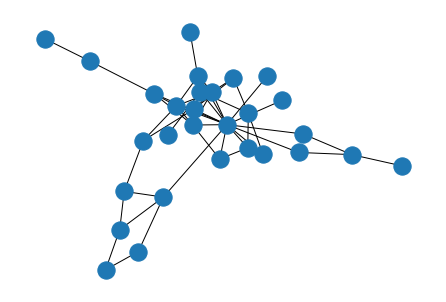

24 ('ADAMTS1', 'VEGFA') removed Graph with 28 nodes and 51 edges


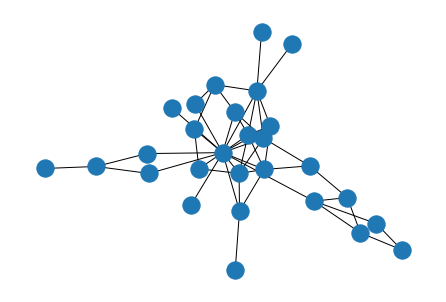

25 ('APOE', 'PSEN1') removed Graph with 29 nodes and 51 edges


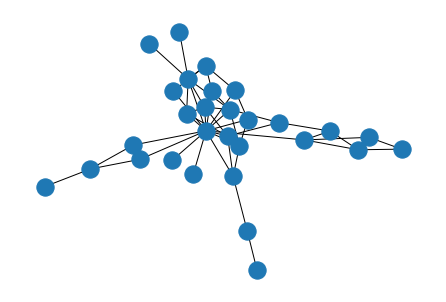

26 ('APOE', 'MAPT') removed Graph with 29 nodes and 51 edges


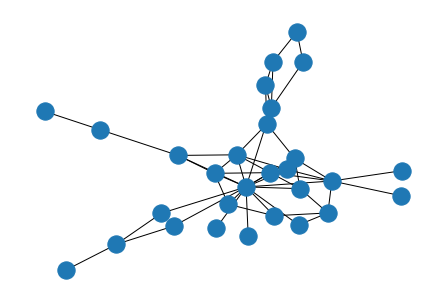

27 ('APOE', 'PRNP') removed Graph with 29 nodes and 51 edges


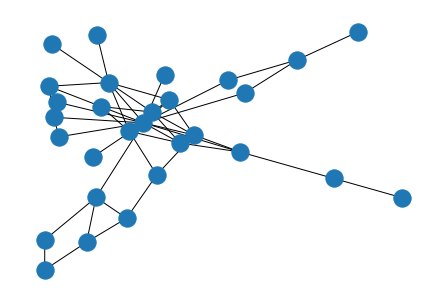

28 ('IGF1', 'IGF1R') removed Graph with 29 nodes and 51 edges


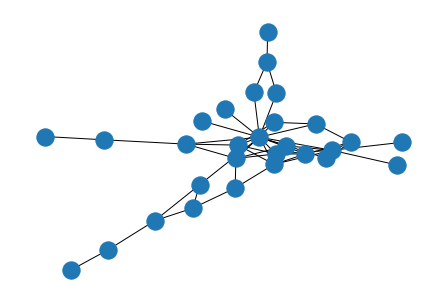

29 ('IGF1', 'TF') removed Graph with 29 nodes and 51 edges


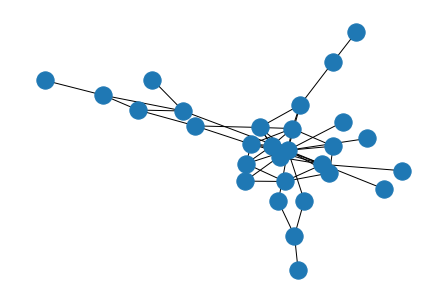

30 ('IGF1R', 'INSR') removed Graph with 29 nodes and 51 edges


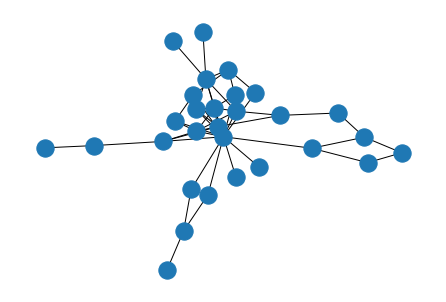

31 ('IGF1R', 'IGF2') removed Graph with 29 nodes and 51 edges


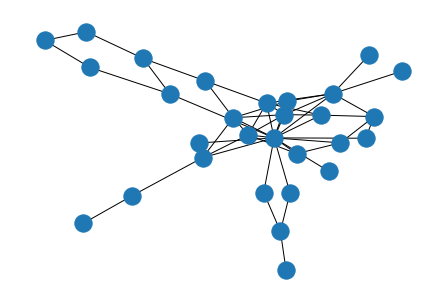

32 ('TF', 'IGF2') removed Graph with 29 nodes and 51 edges


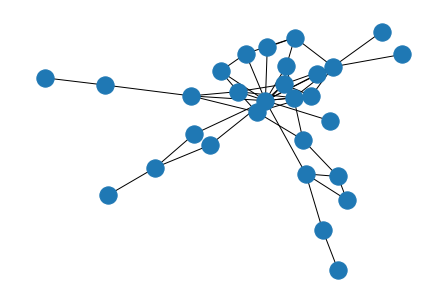

33 ('INSR', 'IGF2') removed Graph with 29 nodes and 51 edges


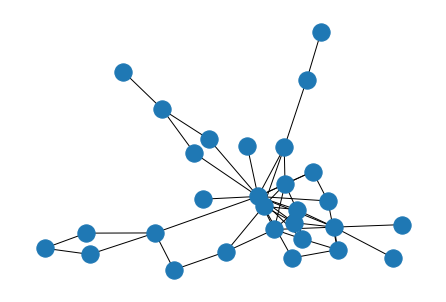

34 ('INSR', 'CALM1') removed Graph with 29 nodes and 51 edges


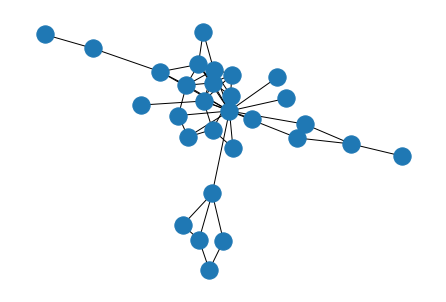

35 ('WWOX', 'ENO1') removed Graph with 28 nodes and 51 edges


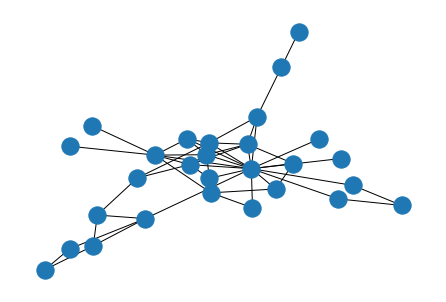

36 ('ENO1', 'ACHE') removed Graph with 29 nodes and 51 edges


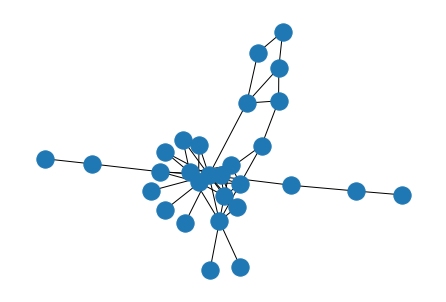

37 ('ENO1', 'ATP5F1A') removed Graph with 29 nodes and 51 edges


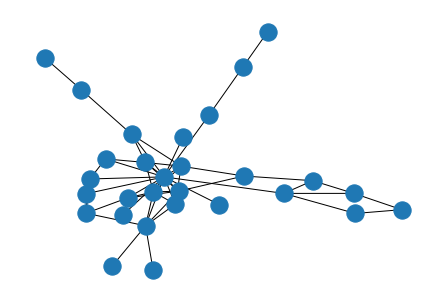

38 ('PSEN1', 'MAPT') removed Graph with 29 nodes and 51 edges


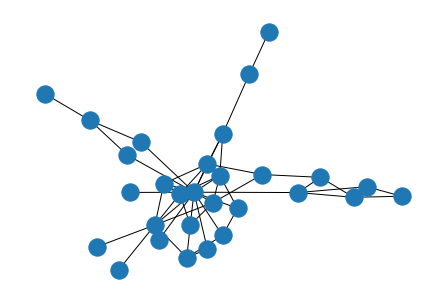

39 ('PSEN1', 'PSEN2') removed Graph with 29 nodes and 51 edges


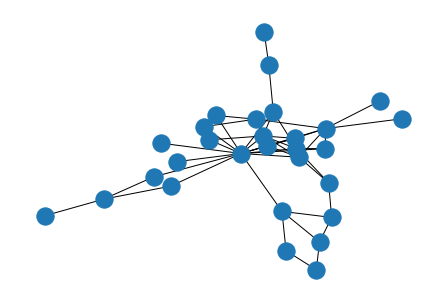

40 ('PSEN1', 'CASP3') removed Graph with 29 nodes and 51 edges


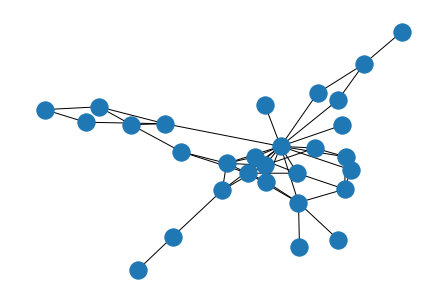

41 ('PSEN1', 'GSK3B') removed Graph with 29 nodes and 51 edges


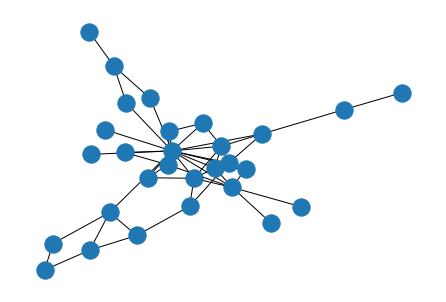

42 ('MAPT', 'CALM1') removed Graph with 29 nodes and 51 edges


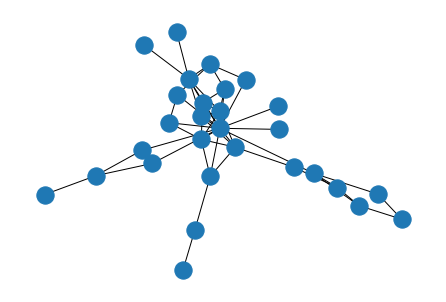

43 ('MAPT', 'CASP3') removed Graph with 29 nodes and 51 edges


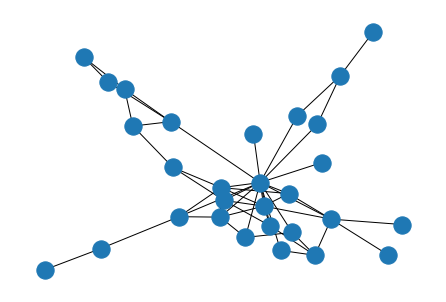

44 ('MAPT', 'GSK3B') removed Graph with 29 nodes and 51 edges


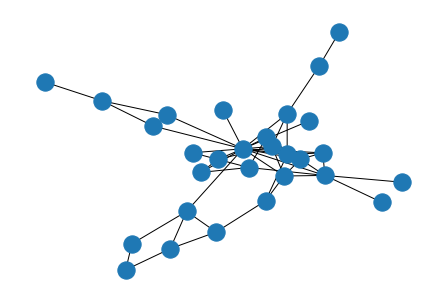

45 ('PSEN2', 'CASP3') removed Graph with 29 nodes and 51 edges


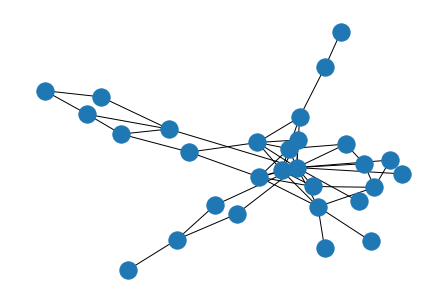

46 ('CASP3', 'EIF2S1') removed Graph with 28 nodes and 51 edges


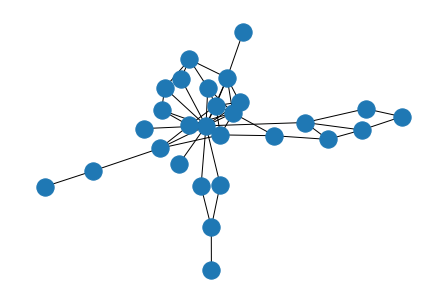

47 ('CASP3', 'BAX') removed Graph with 29 nodes and 51 edges


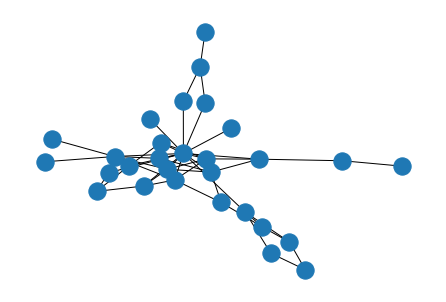

48 ('CASP3', 'PICALM') removed Graph with 28 nodes and 51 edges


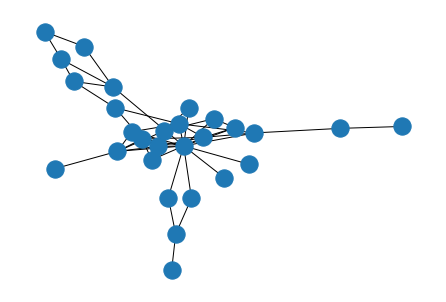

49 ('GSK3B', 'BAX') removed Graph with 29 nodes and 51 edges


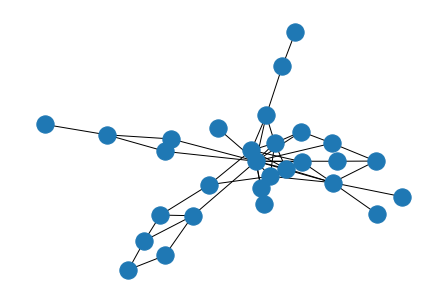

50 ('CLU', 'BAX') removed Graph with 29 nodes and 51 edges


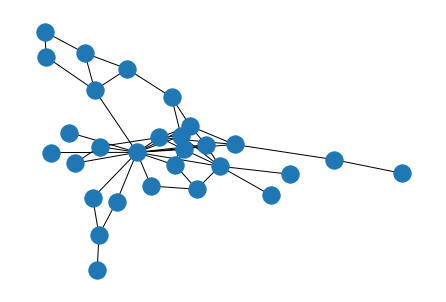

51 ('CLU', 'PRNP') removed Graph with 29 nodes and 51 edges


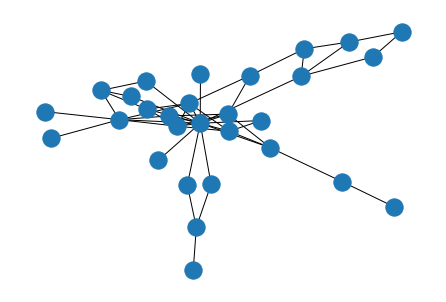

52 ('BAX', 'TOMM40') removed Graph with 29 nodes and 51 edges


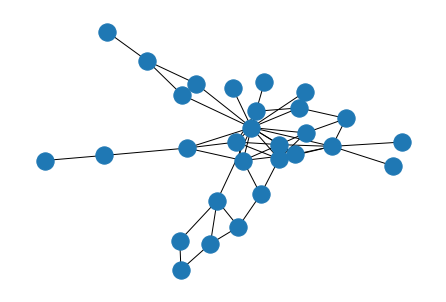

In [6]:
# Delete edges (one each loop)
count = 1
for edge in edges:
    G = nx.read_edgelist('data/bio_networks/AD_SNAP_PPI_brain.edgelist')
    G.remove_edge(edge[0], edge[1])
    
    for component in list(nx.connected_components(G)):
        if len(component)<5:
            for node_c in component:
                G.remove_node(node_c)
    
    print(count, edge, 'removed', G)
    nx.draw(G)
    plt.show()
    
    nx.write_edgelist(G, f'data/sensitivity_analysis/AD_SNAP_PPI_brain_no{edge[0]}_{edge[1]}.edgelist')
    
    count +=1

In [6]:
dataset = 'ADNI'
targets = ['PET', 'PETandDX']
networks = os.listdir('data/sensitivity_analysis') # total = 28 (nodes) + 52 (edges) = 80 networks -> 80 graph datasets

for target in targets:
    for network in networks:

        outdir = f'data/graph_datasets/{target}/sensitivity_analysis'

        result_nodes = create_nx_datasets.main('data', dataset, target, 'AD', network, 'missense', None)
        network = network.replace('.edgelist','')
        outfile = f'{outdir}/{network}_missense.pkl'
        print('Resulting dataset saved at:', outfile)
        print()

        with open(outfile, 'wb') as f:
            pickle.dump(result_nodes, f)

data/sensitivity_analysis/AD_SNAP_PPI_brain_noATP5F1A.edgelist
Network used: AD AD_SNAP_PPI_brain_noATP5F1A.edgelist
# nodes = 28
# edges = 50

Dataset used: ADNI
missense
(28, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 28 # edges = 50
Density = 0.13227513227513227 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PET/sensitivity_analysis/AD_SNAP_PPI_brain_noATP5F1A_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noGSK3B_BAX.edgelist
Network used: AD AD_SNAP_PPI_brain_noGSK3B_BAX.edgelist
# nodes = 29
# edges = 51

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 29 # edges = 51
Density = 0.12561576354679804 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PET/sensitivity_analysis/AD_SNAP_PPI_brain_noGSK3B_BAX_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noPSEN2_CASP3.edgelist
N

data/sensitivity_analysis/AD_SNAP_PPI_brain_noADAMTS1.edgelist
Network used: AD AD_SNAP_PPI_brain_noADAMTS1.edgelist
# nodes = 27
# edges = 50

Dataset used: ADNI
missense
(27, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 27 # edges = 50
Density = 0.14245014245014245 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PET/sensitivity_analysis/AD_SNAP_PPI_brain_noADAMTS1_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noA2M.edgelist
Network used: AD AD_SNAP_PPI_brain_noA2M.edgelist
# nodes = 26
# edges = 47

Dataset used: ADNI
missense
(26, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 26 # edges = 47
Density = 0.14461538461538462 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PET/sensitivity_analysis/AD_SNAP_PPI_brain_noA2M_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noIGF1_TF.edgelist
Network used: AD AD_SNA

data/sensitivity_analysis/AD_SNAP_PPI_brain_noTF.edgelist
Network used: AD AD_SNAP_PPI_brain_noTF.edgelist
# nodes = 28
# edges = 50

Dataset used: ADNI
missense
(28, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 28 # edges = 50
Density = 0.13227513227513227 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PET/sensitivity_analysis/AD_SNAP_PPI_brain_noTF_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noWWOX.edgelist
Network used: AD AD_SNAP_PPI_brain_noWWOX.edgelist
# nodes = 28
# edges = 51

Dataset used: ADNI
missense
(28, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 28 # edges = 51
Density = 0.1349206349206349 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PET/sensitivity_analysis/AD_SNAP_PPI_brain_noWWOX_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noAPOE_PSEN1.edgelist
Network used: AD AD_SNAP_PPI_brai

data/sensitivity_analysis/AD_SNAP_PPI_brain_noPSEN1_MAPT.edgelist
Network used: AD AD_SNAP_PPI_brain_noPSEN1_MAPT.edgelist
# nodes = 29
# edges = 51

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 29 # edges = 51
Density = 0.12561576354679804 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PET/sensitivity_analysis/AD_SNAP_PPI_brain_noPSEN1_MAPT_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noCALM1.edgelist
Network used: AD AD_SNAP_PPI_brain_noCALM1.edgelist
# nodes = 28
# edges = 49

Dataset used: ADNI
missense
(28, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 28 # edges = 49
Density = 0.12962962962962962 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PET/sensitivity_analysis/AD_SNAP_PPI_brain_noCALM1_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noVEGFA.edgelist
Network us

data/sensitivity_analysis/AD_SNAP_PPI_brain_noPSEN1_PSEN2.edgelist
Network used: AD AD_SNAP_PPI_brain_noPSEN1_PSEN2.edgelist
# nodes = 29
# edges = 51

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 29 # edges = 51
Density = 0.12561576354679804 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PET/sensitivity_analysis/AD_SNAP_PPI_brain_noPSEN1_PSEN2_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noIGF1_IGF1R.edgelist
Network used: AD AD_SNAP_PPI_brain_noIGF1_IGF1R.edgelist
# nodes = 29
# edges = 51

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 29 # edges = 51
Density = 0.12561576354679804 Diameter = 7
Resulting dataset saved at: data/graph_datasets/PET/sensitivity_analysis/AD_SNAP_PPI_brain_noIGF1_IGF1R_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noENO1.ed

(29, 808)
Creating samples graphs...
Class: PETandDX. Found 182 positive subjects out of 317
Sample graph used: # nodes = 29 # edges = 51
Density = 0.12561576354679804 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PETandDX/sensitivity_analysis/AD_SNAP_PPI_brain_noPSEN1_CASP3_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noAPP_CLU.edgelist
Network used: AD AD_SNAP_PPI_brain_noAPP_CLU.edgelist
# nodes = 29
# edges = 51

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PETandDX. Found 182 positive subjects out of 317
Sample graph used: # nodes = 29 # edges = 51
Density = 0.12561576354679804 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PETandDX/sensitivity_analysis/AD_SNAP_PPI_brain_noAPP_CLU_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noAPP_ACHE.edgelist
Network used: AD AD_SNAP_PPI_brain_noAPP_ACHE.edgelist
# nodes = 29
# edges = 51

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PETa

data/sensitivity_analysis/AD_SNAP_PPI_brain_noIGF1.edgelist
Network used: AD AD_SNAP_PPI_brain_noIGF1.edgelist
# nodes = 28
# edges = 50

Dataset used: ADNI
missense
(28, 808)
Creating samples graphs...
Class: PETandDX. Found 182 positive subjects out of 317
Sample graph used: # nodes = 28 # edges = 50
Density = 0.13227513227513227 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PETandDX/sensitivity_analysis/AD_SNAP_PPI_brain_noIGF1_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noENO1_ACHE.edgelist
Network used: AD AD_SNAP_PPI_brain_noENO1_ACHE.edgelist
# nodes = 29
# edges = 51

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PETandDX. Found 182 positive subjects out of 317
Sample graph used: # nodes = 29 # edges = 51
Density = 0.12561576354679804 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PETandDX/sensitivity_analysis/AD_SNAP_PPI_brain_noENO1_ACHE_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noAPP_SOD2.ed

(22, 808)
Creating samples graphs...
Class: PETandDX. Found 182 positive subjects out of 317
Sample graph used: # nodes = 22 # edges = 33
Density = 0.14285714285714285 Diameter = 7
Resulting dataset saved at: data/graph_datasets/PETandDX/sensitivity_analysis/AD_SNAP_PPI_brain_noAPP_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noMAPT.edgelist
Network used: AD AD_SNAP_PPI_brain_noMAPT.edgelist
# nodes = 28
# edges = 46

Dataset used: ADNI
missense
(28, 808)
Creating samples graphs...
Class: PETandDX. Found 182 positive subjects out of 317
Sample graph used: # nodes = 28 # edges = 46
Density = 0.12169312169312169 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PETandDX/sensitivity_analysis/AD_SNAP_PPI_brain_noMAPT_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noCASP3_BAX.edgelist
Network used: AD AD_SNAP_PPI_brain_noCASP3_BAX.edgelist
# nodes = 29
# edges = 51

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PETandDX. Found 182

data/sensitivity_analysis/AD_SNAP_PPI_brain_noA2M_NOS3.edgelist
Network used: AD AD_SNAP_PPI_brain_noA2M_NOS3.edgelist
# nodes = 29
# edges = 51

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PETandDX. Found 182 positive subjects out of 317
Sample graph used: # nodes = 29 # edges = 51
Density = 0.12561576354679804 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PETandDX/sensitivity_analysis/AD_SNAP_PPI_brain_noA2M_NOS3_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_noINSR_IGF2.edgelist
Network used: AD AD_SNAP_PPI_brain_noINSR_IGF2.edgelist
# nodes = 29
# edges = 51

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PETandDX. Found 182 positive subjects out of 317
Sample graph used: # nodes = 29 # edges = 51
Density = 0.12561576354679804 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PETandDX/sensitivity_analysis/AD_SNAP_PPI_brain_noINSR_IGF2_missense.pkl

data/sensitivity_analysis/AD_SNAP_PPI_brain_n

missense
(29, 808)
Creating samples graphs...
Class: PETandDX. Found 182 positive subjects out of 317
Sample graph used: # nodes = 29 # edges = 51
Density = 0.12561576354679804 Diameter = 6
Resulting dataset saved at: data/graph_datasets/PETandDX/sensitivity_analysis/AD_SNAP_PPI_brain_noAPP_ATP5F1A_missense.pkl



In [41]:
original_pet = pd.read_csv('results/2022_03_networks_PET.csv', index_col='fold')
nodes_pet = pd.read_csv('results/2022_05_sensitivity_analysis_nodes_PET.csv', index_col='fold')
edges_pet = pd.read_csv('results/2022_05_sensitivity_analysis_edges_PET.csv', index_col='fold')

In [17]:
nodes_pet

,dataset,acc,pre,rec,f1,auc
fold,,,,,,
1,A2M,0.6803,0.7489,0.6504,0.6958,0.7031
2,A2M,0.5844,0.6000,0.8862,0.7034,0.6359
3,A2M,0.5662,0.6372,0.5285,0.5775,0.5690
4,A2M,0.5981,0.7551,0.5854,0.5815,0.7516
5,A2M,0.7580,0.7574,0.8374,0.7953,0.7821
...,...,...,...,...,...,...
6,WWOX,0.6164,0.7241,0.5122,0.6000,0.6592
7,WWOX,0.5833,0.6341,0.6341,0.6341,0.6071
8,WWOX,0.6343,0.7077,0.6098,0.6551,0.6661


In [63]:
tmp_pet = original_pet.loc[(original_pet['dataset'] == 'AD PPT-Ohmnet')]
nodes_pet = nodes_pet.append(tmp_pet[['dataset', 'acc', 'pre', 'rec', 'f1', 'auc']])
edges_pet = edges_pet.append(tmp_pet[['dataset', 'acc', 'pre', 'rec', 'f1', 'auc']])

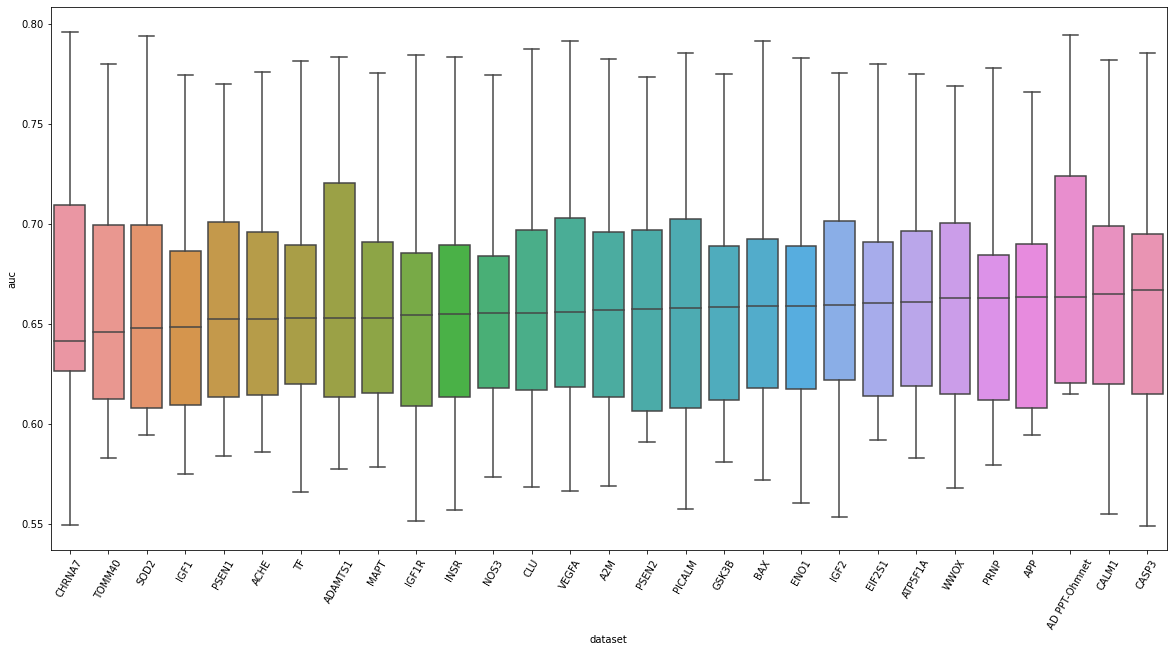

In [69]:
grouped = nodes_pet.loc[:,['dataset', 'auc']] \
    .groupby(['dataset']) \
    .median() \
    .sort_values(by='auc')

plt.figure(figsize=(20, 10))
# sns.barplot(data=nodes_pet, x='dataset', y='auc')
sns.boxplot(data=nodes_pet, x='dataset', y='auc', order=grouped.index)
plt.xticks(rotation=60)
plt.show()

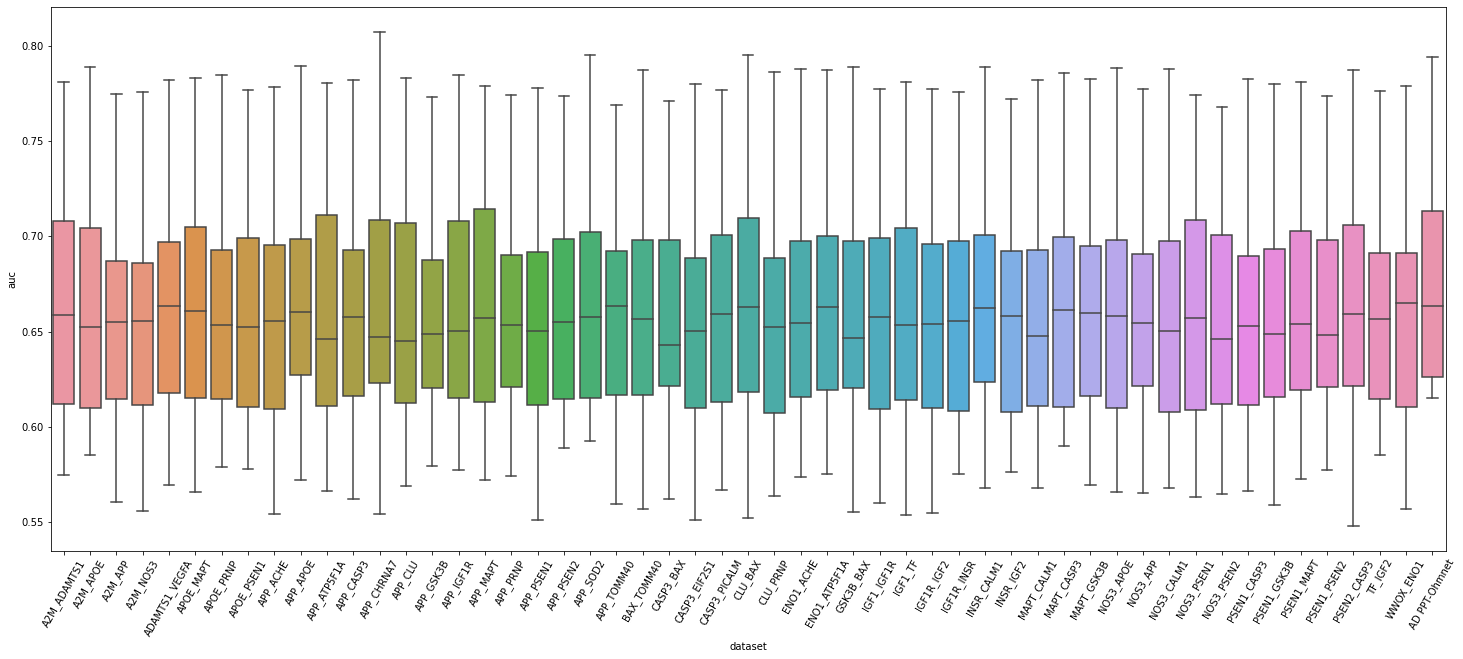

In [55]:
plt.figure(figsize=(25, 10))
# sns.barplot(data=nodes_pet, x='dataset', y='auc')
sns.boxplot(data=edges_pet, x='dataset', y='auc')
plt.xticks(rotation=60)
plt.show()

In [56]:
def pvalues_sensitivity(df):
    pvalues = {}
    for d in df['dataset'].unique():
        
        original = df.loc[df['dataset'] == 'AD PPT-Ohmnet']['auc'].values
        changed  = df.loc[df['dataset'] == d]['auc'].values

        t, pval = stats.ttest_ind(changed, original, alternative='less')
        pvalues[d] = pval
    
    pvalues_sorted = {k: v for k, v in sorted(pvalues.items(), key=lambda item: item[1])}
    
    print('Against original network:')
    counter = 1
    for k in pvalues_sorted:
        p = pvalues_sorted[k]
        if p < 0.05:
            print(counter, '(*)', '{:0.4e}'.format(p), k)
            counter += 1
        else:
            print(counter, '( )', '{:0.4e}'.format(p), k)
            counter += 1
    print()

    return pvalues_sorted

In [59]:
pvalues_nodes_pet = pvalues_sensitivity(nodes_pet)

Against original network:
1 ( ) 5.0000e-01 AD PPT-Ohmnet
2 ( ) 6.3853e-01 CHRNA7
3 ( ) 6.5692e-01 ADAMTS1
4 ( ) 6.6544e-01 CALM1
5 ( ) 6.7571e-01 SOD2
6 ( ) 6.8377e-01 ATP5F1A
7 ( ) 6.8906e-01 VEGFA
8 ( ) 6.9400e-01 BAX
9 ( ) 7.0020e-01 APP
10 ( ) 7.0473e-01 CASP3
11 ( ) 7.0725e-01 PRNP
12 ( ) 7.0935e-01 CLU
13 ( ) 7.1012e-01 EIF2S1
14 ( ) 7.1114e-01 IGF2
15 ( ) 7.1658e-01 PSEN2
16 ( ) 7.1699e-01 PSEN1
17 ( ) 7.2016e-01 A2M
18 ( ) 7.2284e-01 ACHE
19 ( ) 7.2453e-01 WWOX
20 ( ) 7.2463e-01 ENO1
21 ( ) 7.2717e-01 TOMM40
22 ( ) 7.2822e-01 MAPT
23 ( ) 7.2892e-01 TF
24 ( ) 7.2963e-01 NOS3
25 ( ) 7.3459e-01 PICALM
26 ( ) 7.3707e-01 IGF1R
27 ( ) 7.3798e-01 GSK3B
28 ( ) 7.5551e-01 INSR
29 ( ) 7.7308e-01 IGF1



In [60]:
pvalues_nodes_pet = pvalues_sensitivity(edges_pet)

Against original network:
1 ( ) 5.0000e-01 AD PPT-Ohmnet
2 ( ) 6.0603e-01 APP_CHRNA7
3 ( ) 6.3458e-01 APP_SOD2
4 ( ) 6.5411e-01 PSEN2_CASP3
5 ( ) 6.5846e-01 APP_APOE
6 ( ) 6.6586e-01 ENO1_ATP5F1A
7 ( ) 6.6801e-01 ADAMTS1_VEGFA
8 ( ) 6.7076e-01 INSR_CALM1
9 ( ) 6.7222e-01 APOE_MAPT
10 ( ) 6.7285e-01 A2M_ADAMTS1
11 ( ) 6.7736e-01 CLU_BAX
12 ( ) 6.7770e-01 APP_IGF1R
13 ( ) 6.8146e-01 MAPT_CASP3
14 ( ) 6.8218e-01 PSEN1_MAPT
15 ( ) 6.8226e-01 MAPT_GSK3B
16 ( ) 6.8409e-01 APP_MAPT
17 ( ) 6.8559e-01 BAX_TOMM40
18 ( ) 6.8863e-01 APP_PSEN2
19 ( ) 7.0367e-01 NOS3_APOE
20 ( ) 7.0379e-01 A2M_APOE
21 ( ) 7.0414e-01 ENO1_ACHE
22 ( ) 7.0500e-01 TF_IGF2
23 ( ) 7.0884e-01 PSEN1_PSEN2
24 ( ) 7.1062e-01 GSK3B_BAX
25 ( ) 7.1101e-01 APP_CASP3
26 ( ) 7.1325e-01 CASP3_PICALM
27 ( ) 7.1992e-01 APOE_PRNP
28 ( ) 7.2332e-01 APP_PRNP
29 ( ) 7.2434e-01 APOE_PSEN1
30 ( ) 7.2630e-01 WWOX_ENO1
31 ( ) 7.2641e-01 NOS3_PSEN1
32 ( ) 7.2768e-01 IGF1_TF
33 ( ) 7.2768e-01 APP_TOMM40
34 ( ) 7.2771e-01 NOS3_APP
35 ( ) 7.2820e